In [12]:
import fitness
import glouton
import random_schedule
import local_search_descente
import simulated_annealing
import matplotlib.pyplot as plt
import time
import random

# Fonction d'affichage pour la planification
import matplotlib.pyplot as plt
import numpy as np
import AGSimple
import AGlocalsearch

num_teams = 8

In [13]:
# Fonction d'affichage pour la planification
def print_schedule(schedule, filename='schedule.png'):
    num_weeks = len(schedule)
    num_periods = len(schedule[0]) if num_weeks > 0 else 0

    # Créer une matrice pour représenter le tableau
    schedule_matrix = np.full((num_weeks, num_periods), '', dtype=object)

    # Remplir la matrice avec les équipes ou une indication de cellule vide
    for week in range(num_weeks):
        for period in range(num_periods):
            match = schedule[week][period]
            if match:
                schedule_matrix[week, period] = f"{match[0]} vs {match[1]}"
            else:
                schedule_matrix[week, period] = "(vide)"

    # Créer une figure et des axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Afficher le tableau avec Matplotlib
    ax.axis('tight')
    ax.axis('off')

    # Créer un tableau à partir de la matrice
    table = ax.table(cellText=schedule_matrix,
                     colLabels=[f"Période {i+1}" for i in range(num_periods)],
                     rowLabels=[f"Semaine {i+1}" for i in range(num_weeks)],
                     cellLoc='center',
                     loc='center')

    # Personnaliser l'apparence du tableau
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)  # Ajustez la taille des cellules si nécessaire

    # Sauvegarder l'image du tableau
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  # Afficher le tableau

In [14]:
def mean_score(algo='glouton', num_teams=8, it=200):
    sum_fitness = 0  # Pour stocker la somme des scores de fitness
    total_time = 0   # Pour stocker la somme des temps d'exécution
    max_fitness = 0  # Pour stocker le score de fitness maximal
    min_fitness = 1000000  # Pour stocker le score de fitness minimal
    best_params = {} # Pour stocker les meilleurs paramètres

    for i in range(it):
        start_time = time.time()  # Démarre le chronomètre pour l'itération
        
        # Random temperature and cooling rate

        initial_temp = random.uniform(50, 300)
        cooling_rate = random.uniform(0.60, 0.99)

        # Choisir la méthode de planification
        if algo == 'glouton':
            schedule = glouton.round_robin_schedule(num_teams)
        elif algo == 'random':
            schedule = random_schedule.random_round_robin_schedule(num_teams)
        elif algo == 'local_search_random':
            schedule = local_search_descente.local_search(random_schedule.random_round_robin_schedule(num_teams), num_teams, max_iterations=1000, verbose=False)[0]
        elif algo == 'local_search_glouton':
            schedule = local_search_descente.local_search(glouton.round_robin_schedule(num_teams), num_teams, max_iterations=1000, verbose=False)[0]
        elif algo == 'simulated_annealing_random':
            schedule = simulated_annealing.simulated_annealing(random_schedule.random_round_robin_schedule(num_teams), num_teams, max_iterations=2000, verbose=False, initial_temp=initial_temp, cooling_rate=cooling_rate)[0]
        elif algo == 'simulated_annealing_glouton':
            schedule = simulated_annealing.simulated_annealing(glouton.round_robin_schedule(num_teams), num_teams, max_iterations=2000, verbose=False, initial_temp=initial_temp, cooling_rate=cooling_rate)[0]
        elif algo == 'genetic_algorithm_simple':
            schedule = AGSimple.genetic_algorithm(20, num_teams, 600)[0]
        elif algo == 'genetic_algorithm_local_search':
            schedule = AGlocalsearch.genetic_algorithm(20, num_teams, 600)[0]
        # Calculer le score de fitness
        score = fitness.evaluate_schedule(schedule, 8, False)
        sum_fitness += score  # Ajoute le score de fitness à la somme totale
        
        if score < min_fitness:
            min_fitness = score
            best_params = {'initial_temp': initial_temp, 'cooling_rate': cooling_rate}
        if score > max_fitness:
            max_fitness = score

        end_time = time.time()  # Arrête le chronomètre
        total_time += (end_time - start_time)  # Ajoute le temps écoulé à la somme totale

    # Moyenne des scores et des temps
    mean_fitness = sum_fitness / it
    mean_time = total_time / it

    print("Calcul de la moyenne pour " + algo + " sur " + str(it) + " itérations avec " + str(num_teams) + " équipes")
    print(f"Temps moyen d'exécution pour {algo}: {mean_time:.5f} secondes")
    print(f"Score moyen de fitness pour {algo}: {mean_fitness:.5f}")
    print(f"Score maximal de fitness pour {algo}: {max_fitness:.5f}")
    print(f"Score minimal de fitness pour {algo}: {min_fitness:.5f}")
    if algo == 'simulated_annealing_random' or algo == 'simulated_annealing_glouton':
        print(f"Meilleurs paramètres - Température initiale: {best_params['initial_temp']:.2f}, Taux de refroidissement: {best_params['cooling_rate']:.2f}")
    print("\n")

    return mean_fitness, mean_time



Calcul de la moyenne pour glouton sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour glouton: 0.00003 secondes
Score moyen de fitness pour glouton: 640.00000
Score maximal de fitness pour glouton: 640.00000
Score minimal de fitness pour glouton: 640.00000


Exemple de planification pour un glouton : Score de la planification (pénalités totales): 640


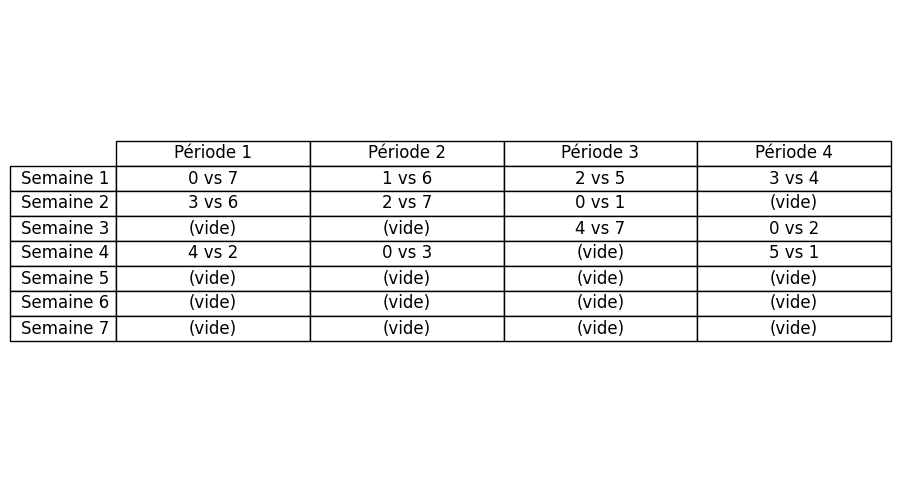

In [15]:

    num_teams = 8
    # glouton 
    scheduleGlouton = glouton.round_robin_schedule(num_teams)
    penaltyGlouton = fitness.evaluate_schedule(scheduleGlouton, num_teams, False)
    print("\n")
    mean_score('glouton')
    print(f"Exemple de planification pour un glouton : Score de la planification (pénalités totales): {penaltyGlouton}")
    print_schedule(scheduleGlouton)




Calcul de la moyenne pour random sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour random: 0.00004 secondes
Score moyen de fitness pour random: 460.58500
Score maximal de fitness pour random: 664.00000
Score minimal de fitness pour random: 311.00000


Exemple de planification pour un random : Score de la planification (pénalités totales): 520


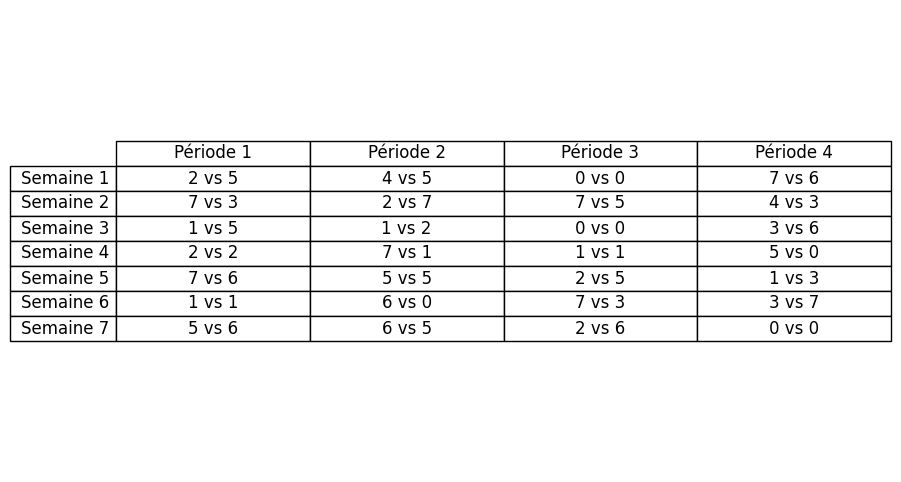

In [16]:
    # random
    scheduleRandom = random_schedule.random_round_robin_schedule(num_teams)
    penaltyRandom = fitness.evaluate_schedule(scheduleRandom, num_teams, False)
    print("\n")
    mean_score('random')
    print(f"Exemple de planification pour un random : Score de la planification (pénalités totales): {penaltyRandom}")
    print_schedule(scheduleRandom)



Calcul de la moyenne pour local_search_random sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour local_search_random: 0.07042 secondes
Score moyen de fitness pour local_search_random: 56.88500
Score maximal de fitness pour local_search_random: 133.00000
Score minimal de fitness pour local_search_random: 16.00000


Exemple de planification pour la recherche locale a partir d'un random : Score de la planification (pénalités totales): 38


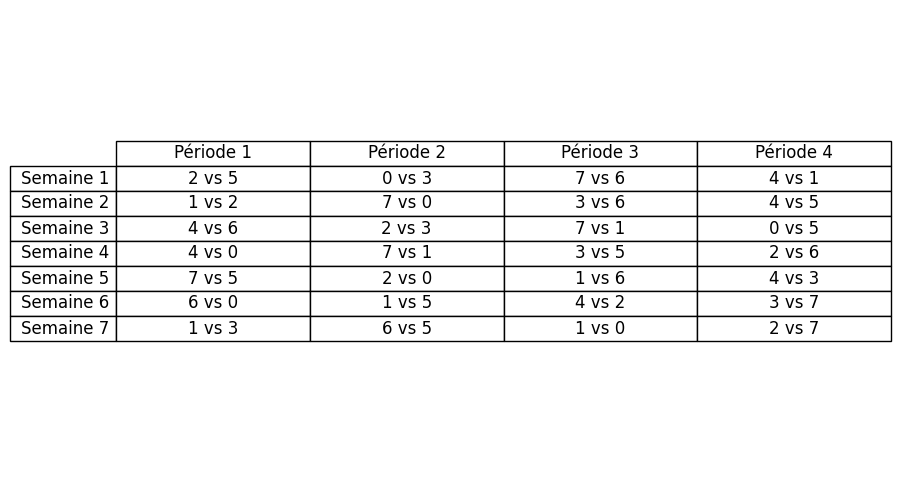

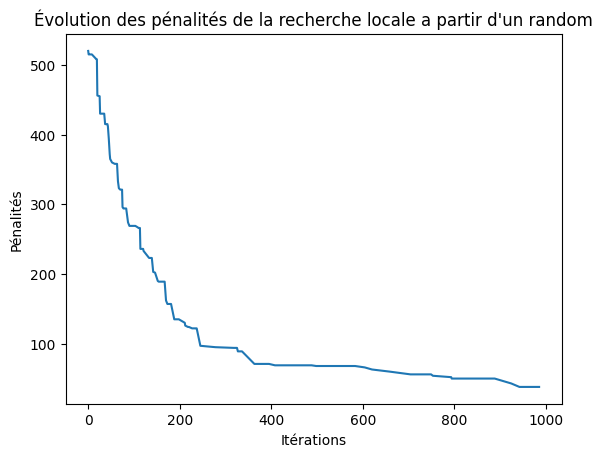

In [17]:
    # recherche locale
    scheduleLocal, penaltyLocal, penalty_history = local_search_descente.local_search(scheduleRandom, num_teams, max_iterations=1000, verbose=False)
    print("\n")
    mean_score('local_search_random')
    print(f"Exemple de planification pour la recherche locale a partir d'un random : Score de la planification (pénalités totales): {penaltyLocal}")
    print_schedule(scheduleLocal)
    # Pour tracer les pénalités
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités de la recherche locale a partir d\'un random')
    plt.show()



Calcul de la moyenne pour local_search_glouton sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour local_search_glouton: 0.07134 secondes
Score moyen de fitness pour local_search_glouton: 48.56000
Score maximal de fitness pour local_search_glouton: 106.00000
Score minimal de fitness pour local_search_glouton: 8.00000


Exemple de planification pour la recherche locale a partir d'un glouton : Score de la planification (pénalités totales): 46


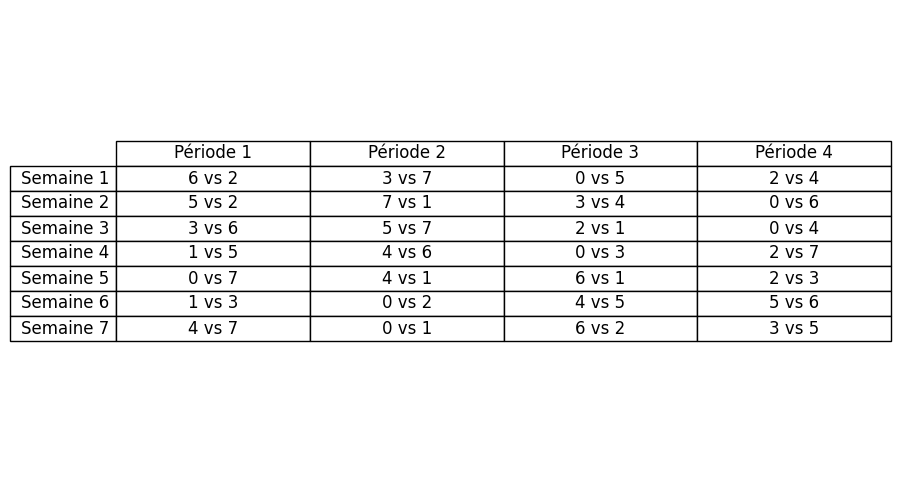

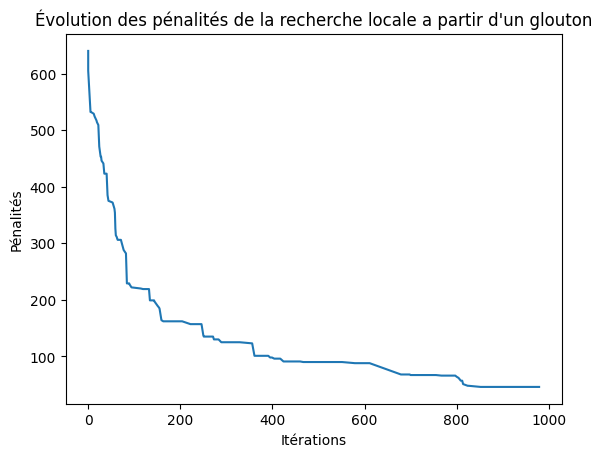

In [18]:
    scheduleLocal, penaltyLocal, penalty_history = local_search_descente.local_search(scheduleGlouton, num_teams, max_iterations=1000, verbose=False)
    print("\n")
    mean_score('local_search_glouton')
    print(f"Exemple de planification pour la recherche locale a partir d'un glouton : Score de la planification (pénalités totales): {penaltyLocal}")
    print_schedule(scheduleLocal)
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités de la recherche locale a partir d\'un glouton')
    plt.show()



Calcul de la moyenne pour simulated_annealing_random sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour simulated_annealing_random: 0.01140 secondes
Score moyen de fitness pour simulated_annealing_random: 418.46000
Score maximal de fitness pour simulated_annealing_random: 584.00000
Score minimal de fitness pour simulated_annealing_random: 253.00000
Meilleurs paramètres - Température initiale: 130.83, Taux de refroidissement: 0.97


Exemple de planification pour le recuit simulé a partir d'un random : Score de la planification (pénalités totales): 456


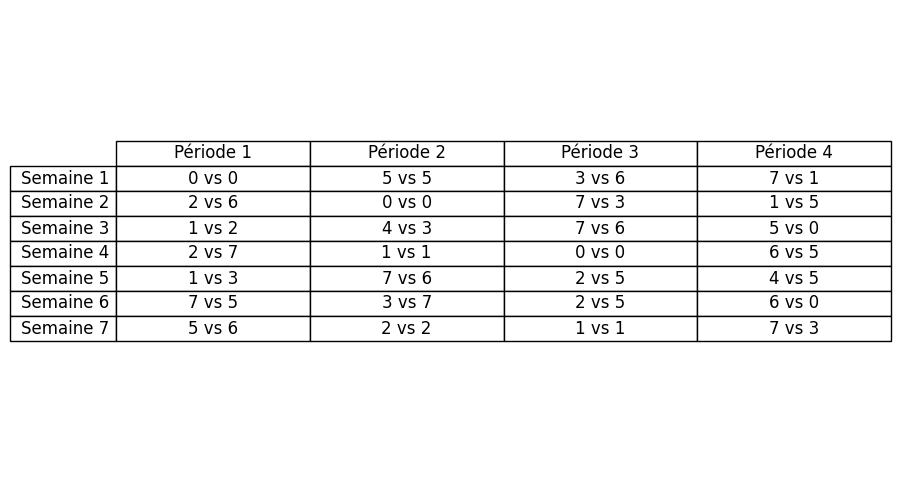

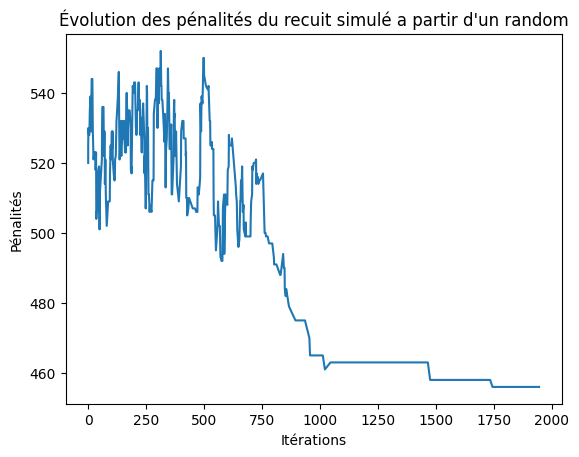

In [19]:
    # Recuit simulé
    scheduleSimulatedAnnealing, penaltySimulatedAnnealing, penalty_history = simulated_annealing.simulated_annealing(scheduleRandom, num_teams, max_iterations=2000, initial_temp=120, cooling_rate=0.99, verbose=False)
    print("\n")
    mean_score('simulated_annealing_random')
    print(f"Exemple de planification pour le recuit simulé a partir d'un random : Score de la planification (pénalités totales): {penaltySimulatedAnnealing}")
    print_schedule(scheduleSimulatedAnnealing)
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités du recuit simulé a partir d\'un random')
    plt.show()



Calcul de la moyenne pour simulated_annealing_glouton sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour simulated_annealing_glouton: 0.01009 secondes
Score moyen de fitness pour simulated_annealing_glouton: 335.89500
Score maximal de fitness pour simulated_annealing_glouton: 468.00000
Score minimal de fitness pour simulated_annealing_glouton: 219.00000
Meilleurs paramètres - Température initiale: 140.74, Taux de refroidissement: 0.93


Exemple de planification pour le recuit simulé a partir d'un glouton : Score de la planification (pénalités totales): 261


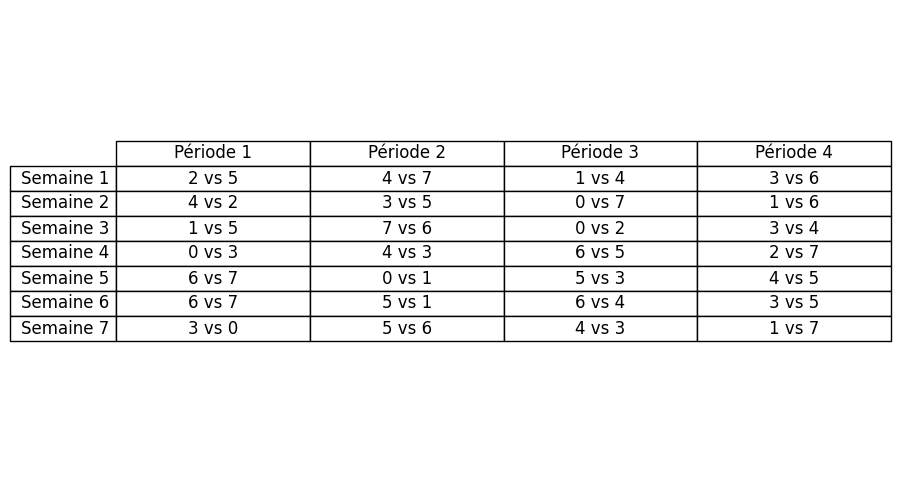

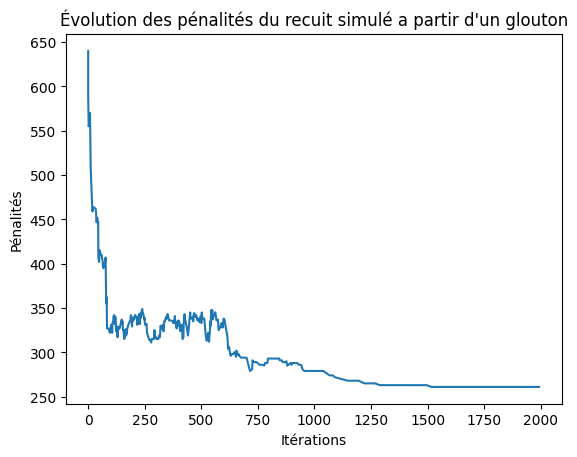

In [20]:
    # Recuit simulé
    scheduleSimulatedAnnealing, penaltySimulatedAnnealing, penalty_history = simulated_annealing.simulated_annealing(scheduleGlouton, num_teams, max_iterations=2000, initial_temp=120, cooling_rate=0.99, verbose=False)
    print("\n")
    mean_score('simulated_annealing_glouton')
    print(f"Exemple de planification pour le recuit simulé a partir d'un glouton : Score de la planification (pénalités totales): {penaltySimulatedAnnealing}")
    print_schedule(scheduleSimulatedAnnealing)
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités du recuit simulé a partir d\'un glouton')
    plt.show()

Meilleure planification trouvée par l'algorithme génétique: Score de la planification (pénalités totales): 70 sur un essai


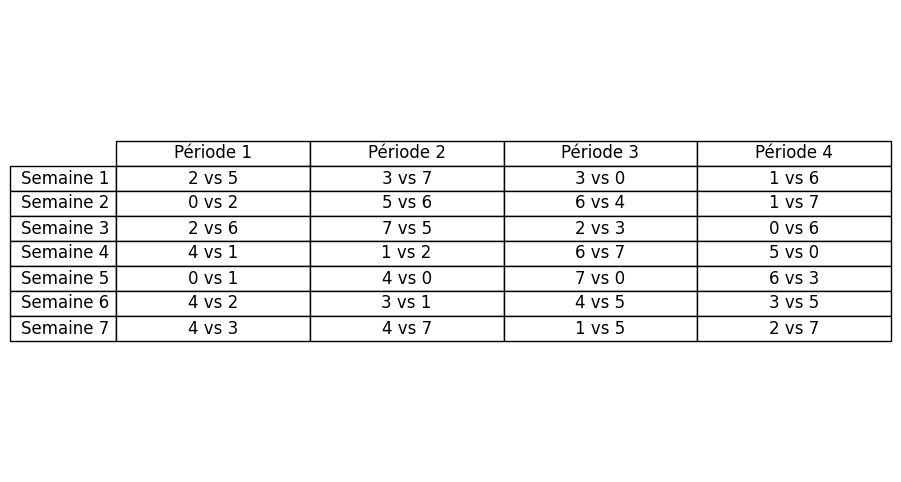

In [ ]:
# Example parameters
pop_size = 20  # Size of the population
max_generations = 1000  # Number of generations to run

# Run the genetic algorithm
best_schedule, best_penalty, penalty_history = AGSimple.genetic_algorithm(pop_size, num_teams, max_generations)

# Print the best schedule found
print(f"Meilleure planification trouvée par l'algorithme génétique simple: Score de la planification (pénalités totales): {best_penalty} sur un essai")
print_schedule(best_schedule)

mean_score('genetic_algorithm_simple')
#plot the penalties
iterations = [entry[0] for entry in penalty_history]
penalties = [entry[1] for entry in penalty_history]
    
plt.plot(iterations, penalties)
plt.xlabel('Itérations')
plt.ylabel('Pénalités')
plt.title('Évolution des pénalités du d\'un AG simple')
plt.show()


Meilleure planification trouvée par l'algorithme génétique: Score de la planification (pénalités totales): 2 sur un essai


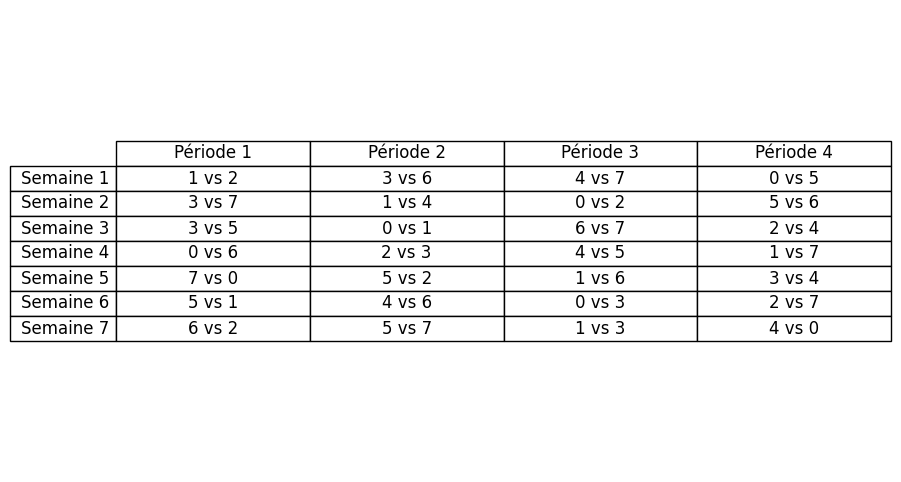

Calcul de la moyenne pour genetic_algorithm_simple sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour genetic_algorithm_simple: 1.02383 secondes
Score moyen de fitness pour genetic_algorithm_simple: 61.82000
Score maximal de fitness pour genetic_algorithm_simple: 106.00000
Score minimal de fitness pour genetic_algorithm_simple: 20.00000




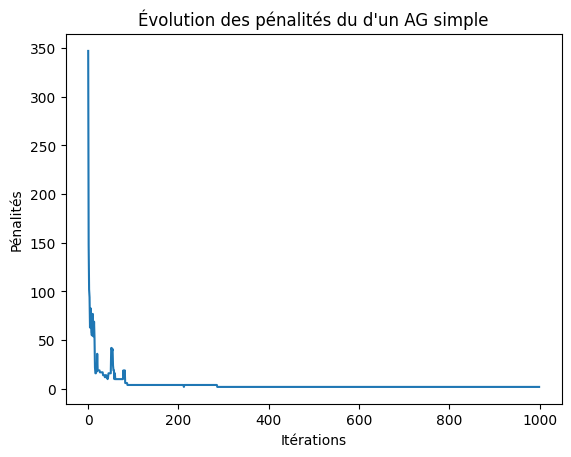

Meilleure planification trouvée par l'algorithme génétique: Score de la planification (pénalités totales): 2 sur un essai


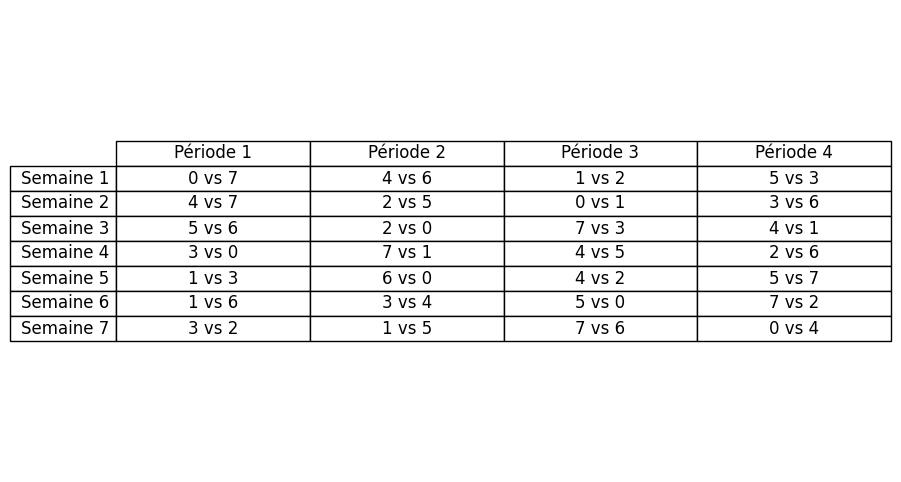

Calcul de la moyenne pour genetic_algorithm_simple sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour genetic_algorithm_simple: 0.99839 secondes
Score moyen de fitness pour genetic_algorithm_simple: 60.84000
Score maximal de fitness pour genetic_algorithm_simple: 99.00000
Score minimal de fitness pour genetic_algorithm_simple: 21.00000




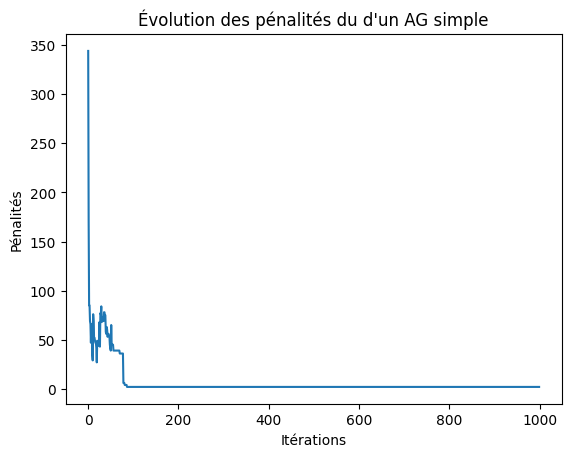

In [22]:
# AG avec recherche locale
pop_size = 20  # Size of the population
max_generations = 600  # Number of generations to run

# Run the genetic algorithm
best_schedule, best_penalty, penalty_history = AGlocalsearch.genetic_algorithm(pop_size, num_teams, max_generations)

# Print the best schedule found
print(f"Meilleure planification trouvée par l'algorithme génétique avec recherche local: Score de la planification (pénalités totales): {best_penalty} sur un essai")
print_schedule(best_schedule)

mean_score('genetic_algorithm_local_search')
#plot the penalties
iterations = [entry[0] for entry in penalty_history]
penalties = [entry[1] for entry in penalty_history]
    
plt.plot(iterations, penalties)
plt.xlabel('Itérations')
plt.ylabel('Pénalités')
plt.title('Évolution des pénalités d\'un AG avec recherche locale')
plt.show()